Accuracy: 0.93
Confusion Matrix:
 [[61  2]
 [ 5 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.94      0.86      0.90        37

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



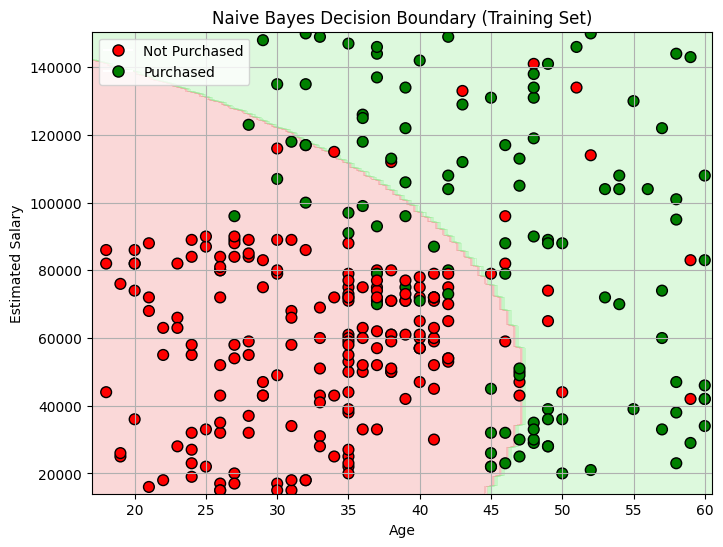

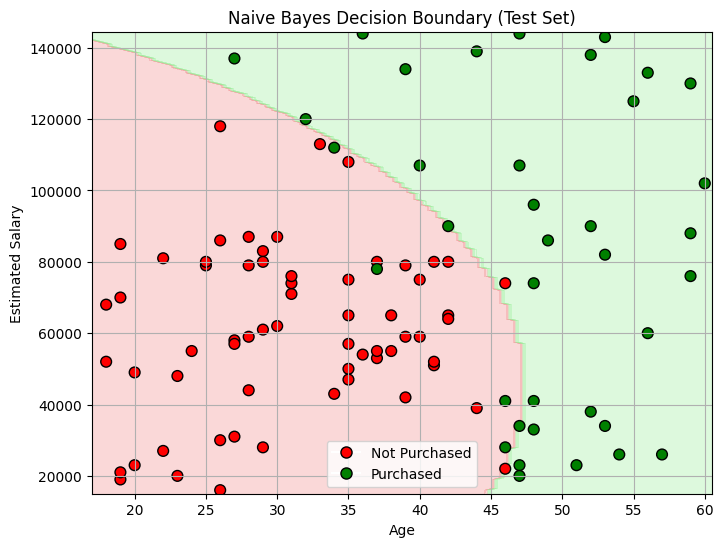

In [5]:
# Goal: Implement a Naive Bayes classifier for the social network ads dataset

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from matplotlib.colors import ListedColormap

# Load the dataset
dataset = pd.read_csv('../datasets/social-network-ads.csv')

# split into features and target
X = dataset.iloc[:, :-1].values  # Features: Age, EstimatedSalary
y = dataset.iloc[:, -1].values  # Target: Purchased

# split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



def plot_decision_boundary(X_scaled, y, model, scaler, title):
    # Inverse transform to original scale for plotting
    X_orig = scaler.inverse_transform(X_scaled)
    x_min, x_max = X_orig[:, 0].min() - 1, X_orig[:, 0].max() + 1
    y_min, y_max = X_orig[:, 1].min() - 1000, X_orig[:, 1].max() + 1000

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.5),
        np.arange(y_min, y_max, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightcoral', 'lightgreen']))
    plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y, cmap=ListedColormap(['red', 'green']), edgecolor='k', s=60)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title(title)
    plt.legend(handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Not Purchased', markerfacecolor='red', markersize=8, markeredgecolor='k'),
        plt.Line2D([0], [0], marker='o', color='w', label='Purchased', markerfacecolor='green', markersize=8, markeredgecolor='k')
    ])
    plt.grid(True)
    plt.show()
    
# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, model, scaler, "Naive Bayes Decision Boundary (Training Set)")

# Plot decision boundary for test set
plot_decision_boundary(X_test, y_test, model, scaler, "Naive Bayes Decision Boundary (Test Set)")
